# kNN

- 유방암 데이터를 이용하여 k가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구하라.  

#### 공통 패키지 불러오기

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import seaborn as sns

# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "Malgun Gothic")

## 데이터 구성하기
- 데이터를 파악하고 이해하기 위해 데이터 수집과 탐색 수행

#### 데이터 불러오기

In [3]:
df_raw = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/유방암.CSV" , encoding = "euc-kr")
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


> 이미 앞전의 인공 신경망 모델 구축에서도 같은 데이터에 대해 탐색했기 때문에, 이 데이터에는 결측치가 존재하지 않음을 이미 알고 있기에 결측치 확인과 변수 타입을 확인하지 않고 넘어가고자 한다.

#### 데이터 전처리 - 목표변수 변환 및 설명/목표변수 분리

In [4]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "양성", 'p', 'n')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,n,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,p,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,n,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,p,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,p,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [5]:
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [6]:
df_raw_y.head()

0    n
1    p
2    n
3    p
4    p
Name: diagnosis, dtype: object

#### train, test 데이터 분할

In [7]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## kNN 모델 생성
- kNN은 거리 기반 모델이기 때문에 표준화가 필요하다.

#### scale 변환

In [8]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [9]:
df_scaled.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,...,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02
mean,2.560452e-16,-6.522560e-16,-2.844947e-16,7.320533e-17,1.136244e-15,-7.632783e-17,1.242062e-16,-1.484923e-16,4.288236e-16,9.887924e-16,...,1.644518e-16,1.130866e-15,3.129441e-16,-6.661338e-17,-1.207368e-15,1.540434e-16,-5.689893e-17,-1.644518e-16,1.769418e-16,1.901257e-16
std,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,...,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00
min,-2.144078e+00,-2.560965e+00,-2.137206e+00,-1.628531e+00,-3.284486e+00,-1.689536e+00,-1.442260e+00,-1.607458e+00,-2.163524e+00,-1.771699e+00,...,-1.906495e+00,-2.517236e+00,-1.914321e+00,-1.421712e+00,-2.234131e+00,-1.476710e+00,-1.648315e+00,-2.165421e+00,-2.145534e+00,-1.602209e+00
25%,-7.111638e-01,-6.908989e-01,-7.057591e-01,-7.252621e-01,-6.409206e-01,-7.374164e-01,-8.191610e-01,-8.985510e-01,-7.241279e-01,-7.283403e-01,...,-7.508361e-01,-6.540078e-01,-7.714095e-01,-7.499304e-01,-6.445040e-01,-7.341324e-01,-7.938634e-01,-8.129523e-01,-6.699070e-01,-6.825086e-01
50%,-1.563406e-01,-2.612060e-02,-1.143788e-01,-2.419430e-01,-5.541402e-02,-1.392174e-01,-1.333628e-01,-4.108234e-02,-7.731061e-02,-1.718356e-01,...,-1.570138e-01,-5.721191e-02,-1.217590e-01,-2.566707e-01,1.596124e-02,-1.815506e-01,-6.154336e-02,1.073604e-01,-1.342341e-01,-2.252776e-01
75%,7.514302e-01,5.252472e-01,7.171588e-01,6.835562e-01,6.109248e-01,5.672238e-01,5.597562e-01,5.952241e-01,5.804388e-01,5.608839e-01,...,7.494228e-01,6.144939e-01,7.138043e-01,6.328921e-01,5.808470e-01,5.542250e-01,6.106452e-01,7.682083e-01,3.324944e-01,5.282929e-01
max,3.315649e+00,4.574242e+00,3.312564e+00,4.326655e+00,4.501416e+00,3.889336e+00,3.597318e+00,3.221391e+00,4.271853e+00,4.842278e+00,...,3.381761e+00,3.694077e+00,3.564468e+00,4.876011e+00,3.647983e+00,4.282831e+00,3.816063e+00,2.165812e+00,5.179179e+00,6.003840e+00


> StandardScaler()를 통해서 설명변수에 대해서 평균은 0, 분산은 1이 되도록 표준화하였음을 알 수 있다.

In [10]:
# 스케일링 후 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, # 설명변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


#### default parameter로 모델 생성

In [12]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_scaled_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(knn_uncustomized.score(df_scaled_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(knn_uncustomized.score(df_scaled_test_x, df_test_y)))

Accucary on training set: 0.958
Accucary on test set: 0.922


In [13]:
knn_uncustomized

KNeighborsClassifier()

> 모델의 정확도는 훈련 데이터에 대해서 95.8%, 92.2%로 성능과 일반성이 좋음을 알 수 있다. 파라미터를 변경하였을 때는 정확도가 어떻게 변하는지 확인해보자.

#### 이웃 수 증가에 따른 정확도 변화

- scaling 후 데이터

In [18]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.969,0.914
1,4,0.979,0.938
2,5,0.958,0.922
3,6,0.974,0.930
4,7,0.964,0.906
5,8,0.958,0.914
6,9,0.964,0.930
7,10,0.964,0.922
8,11,0.964,0.914
9,12,0.974,0.922


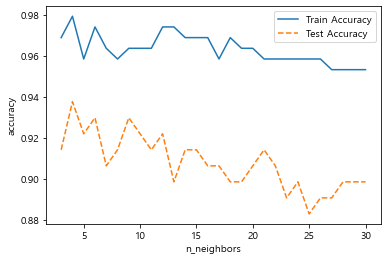

In [19]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

- scaling 전 데이터

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


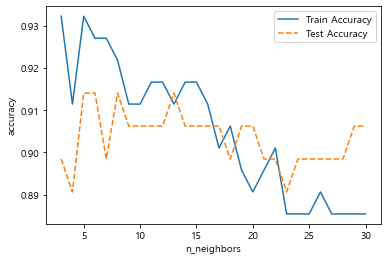

In [17]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

> k가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그래프로 나타내었다. 교수님께 배운 이론으로는 k가 작으면 과대적합의 위험이 증가하고, k가 크면 반대로 과소적합될 가능성이 증가한다고 했는데 스케일링 후 데이터에서 그런 양상이 보이지 않아, 스케일링 전 데이터에서의 양상과 함께 비교해보았다.  
  
> 이론으로 배운 양상은 보이지 않았다. 하지만 이 그래프에서 성능차가 최소화되면서 훈련 데이터와 테스트 데이터의 정확도 변화를 고려했을 때 **k = 9**를 지정하려고 한다. 가중치를 바꿔서 줬을 때 정확도 변화와 거리 계산 방법에 변화를 줬을 때 정확도 변화를 살펴보자.

#### 가중치별 이웃 수 증가에 따른 정확도 변화

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)] * 2
para_weights = (["uniform"]) * 28 + (["distance"]) * 28

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.969,0.914
1,4,uniform,0.979,0.938
2,5,uniform,0.958,0.922
3,6,uniform,0.974,0.930
4,7,uniform,0.964,0.906
5,8,uniform,0.958,0.914
6,9,uniform,0.964,0.930
7,10,uniform,0.964,0.922
8,11,uniform,0.964,0.914
9,12,uniform,0.974,0.922


In [24]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.968750     0.914062  0.914062
4                   1.0  0.979167     0.921875  0.937500
5                   1.0  0.958333     0.921875  0.921875
6                   1.0  0.973958     0.929688  0.929688
7                   1.0  0.963542     0.906250  0.906250
8                   1.0  0.958333     0.914062  0.914062
9                   1.0  0.963542     0.929688  0.929688
10                  1.0  0.963542     0.921875  0.921875
11                  1.0  0.963542     0.914062  0.914062
12                  1.0  0.973958     0.921875  0.921875
13                  1.0  0.973958     0.914062  0.898438
14                  1.0  0.968750     0.914062  0.914062
15                  1.0  0.968750     0.921875  0.914062
16                  1.0  0.968750     0.906250  0.906250
17                  1.0  0.958333     0.906250  0.906250
18                  1.0  0.968750     0.906250  0.898438
19                  1.0  0.963542     0.906250  0.898438
20                  1.0  0.963542     0.914062  0.906250
21                  1.0  0.958333     0.921875  0.914062
22                  1.0  0.958333     0.906250  0.906250
23                  1.0  0.958333     0.906250  0.890625
24                  1.0  0.958333     0.890625  0.898438
25                  1.0  0.958333     0.882812  0.882812
26                  1.0  0.958333     0.882812  0.890625
27                  1.0  0.953125     0.898438  0.890625
28                  1.0  0.953125     0.898438  0.898438
29                  1.0  0.953125     0.906250  0.898438
30                  1.0  0.953125     0.898438  0.898438

In [25]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,0.968750,0.914062,0.914062
4,1.0,0.979167,0.921875,0.937500
5,1.0,0.958333,0.921875,0.921875
6,1.0,0.973958,0.929688,0.929688
7,1.0,0.963542,0.906250,0.906250


<AxesSubplot:xlabel='Neighbors'>

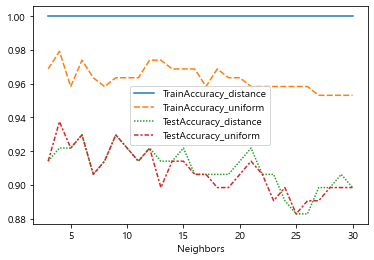

In [28]:
sns.lineplot(data = df_accuracy_weights_pivot)

> 가중치가 distance일 때와 uniform 방식일 때 k가 3~30일 때 정확도 그래프를 그려보았다. 가중치가 distance일 때 훈련 데이터의 정확도는 변동 없이 1이다. 즉, 과대적합임을 알 수 있다. 그에 반해 가중치가 uniform일 때는 훈련데이터의 정확도는 상대적으로 떨어질 지라도 성능 차가 작기 때문에 **가중치는 uniform으로 지정**하였다.

#### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [30]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)] * 3
para_metric = ["minkowski"] * 28 + ["euclidean"] * 28 + ["manhattan"] * 28

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,minkowski,0.969,0.914
1,4,minkowski,0.979,0.938
2,5,minkowski,0.958,0.922
3,6,minkowski,0.974,0.930
4,7,minkowski,0.964,0.906
...,...,...,...,...
79,26,manhattan,0.964,0.898
80,27,manhattan,0.964,0.898
81,28,manhattan,0.964,0.906
82,29,manhattan,0.953,0.906


In [31]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_metric_pivot

TrainAccuracy                     TestAccuracy                    
Metric        euclidean manhattan minkowski    euclidean manhattan minkowski
Neighbors                                                                   
3              0.968750  0.984375  0.968750     0.914062  0.945312  0.914062
4              0.979167  0.979167  0.979167     0.937500  0.937500  0.937500
5              0.958333  0.973958  0.958333     0.921875  0.929688  0.921875
6              0.973958  0.973958  0.973958     0.929688  0.937500  0.929688
7              0.963542  0.963542  0.963542     0.906250  0.914062  0.906250
8              0.958333  0.968750  0.958333     0.914062  0.921875  0.914062
9              0.963542  0.963542  0.963542     0.929688  0.914062  0.929688
10             0.963542  0.968750  0.963542     0.921875  0.921875  0.921875
11             0.963542  0.963542  0.963542     0.914062  0.914062  0.914062
12             0.973958  0.963542  0.973958     0.921875  0.914062  0.921875
13             0.973958  0.963542  0.973958     0.898438  0.906250  0.898438
14             0.968750  0.968750  0.968750     0.914062  0.914062  0.914062
15             0.968750  0.963542  0.968750     0.914062  0.906250  0.914062
16             0.968750  0.973958  0.968750     0.906250  0.906250  0.906250
17             0.958333  0.963542  0.958333     0.906250  0.898438  0.906250
18             0.968750  0.968750  0.968750     0.898438  0.906250  0.898438
19             0.963542  0.963542  0.963542     0.898438  0.890625  0.898438
20             0.963542  0.963542  0.963542     0.906250  0.914062  0.906250
21             0.958333  0.963542  0.958333     0.914062  0.890625  0.914062
22             0.958333  0.963542  0.958333     0.906250  0.890625  0.906250
23             0.958333  0.958333  0.958333     0.890625  0.890625  0.890625
24             0.958333  0.963542  0.958333     0.898438  0.890625  0.898438
25             0.958333  0.963542  0.958333     0.882812  0.890625  0.882812
26             0.958333  0.963542  0.958333     0.890625  0.898438  0.890625
27             0.953125  0.963542  0.953125     0.890625  0.898438  0.890625
28             0.953125  0.963542  0.953125     0.898438  0.906250  0.898438
29             0.953125  0.953125  0.953125     0.898438  0.906250  0.898438
30             0.953125  0.953125  0.953125     0.898438  0.914062  0.898438

<AxesSubplot:xlabel='Neighbors'>

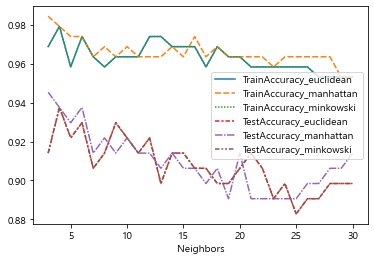

In [32]:
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

> 거리 계산 방법 별로 k가 3~30일 때 정확도 그래프를 그려보았다. 신기하게도 거리 계산 방법 별로 정확도에는 차이가 거의 없음을 알 수 있다.

## 최종 모델 생성 / 결론 도출

In [33]:
knn_final = KNeighborsClassifier(n_neighbors = 9, weights = "uniform", metric = "euclidean")
knn_final.fit(df_scaled_train_x, df_train_y)

y_pred = knn_final.predict(df_scaled_test_x)

print(y_pred)
print()
print("Accuracy on training set: {:.3f}".format(knn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(knn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits =3))

['n' 'n' 'p' 'n' 'n' 'p' 'n' 'n' 'p' 'n' 'n' 'n' 'n' 'p' 'p' 'n' 'p' 'p'
 'p' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'p' 'n' 'n' 'n' 'p' 'p' 'n' 'p' 'n' 'p'
 'n' 'n' 'p' 'n' 'n' 'p' 'p' 'n' 'n' 'n' 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'p'
 'n' 'n' 'n' 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'n' 'p' 'p' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'p' 'p' 'n' 'n' 'n' 'p' 'n' 'n' 'n'
 'p' 'p' 'n' 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'n' 'p' 'n' 'n' 'n' 'p' 'n' 'p'
 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'p' 'n' 'n' 'n' 'n' 'n' 'n' 'p' 'n' 'n' 'n'
 'n' 'p']

Accuracy on training set: 0.964
Accuracy on test set: 0.930

Confusion matrix: 
[[89  8]
 [ 1 30]]
              precision    recall  f1-score   support

           n      0.989     0.918     0.952        97
           p      0.789     0.968     0.870        31

    accuracy                          0.930       128
   macro avg      0.889     0.943     0.911       128
weighted avg      0.941     0.930     0.932       128



> predict 메소드를 통해 구한 예측값은 n, p 두 가지 이산형 범주이다.결국 두가지 클래스로 분류가 되었음을 알 수 있다.

> kNN 모델을 통해 양성 38, 음성 90명으로 분류를 예측하였는데 양성은 30/38, 음성은 89/90 분류 예측이 맞았음을 알 수 있다.

> 유방암 양성(p)의 정밀도는 78.9%로 상대적으로 낮다. 실제로 양성인 표본이 31개밖에 없어 이런 결과를 냈다고 판단했다.

>기존의 훈련 데이터 정확도는 0.958, 테스트 데이터에 대한 정확도는 0.922인데 kNN을 통해 새로 생성한 모델의 훈련 데이터 정확도는 0.964, 테스트 데이터에 대한 정확도는 0.930으로 정확도가 향상하였음을 알 수 있다. 또한 소폭 성능차가 감소하였기 때문에 kNN을 통한 분류 모델링이 실제보다 성능이 좋다고 판단했다.